## Board Game Played Games with Rankings

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.spatial.distance import pdist

from itertools import combinations

In [2]:
csv_file_path = "DFL Game Ratings - Sheet1.csv"

In [3]:
df = pd.read_csv(csv_file_path, header=0, usecols=range(5), index_col=None)

In [4]:
df.head()

,Game,Date,Dennis,Fabiano,Luke
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0
1,Destinies,10-Aug-2022,6.0,NaN,7.0
2,Rajas of the Ganges,11-Aug-2022,9.0,NaN,7.5
3,Dog Lover,11-Aug-2022,6.5,NaN,6.5
4,"Crew: Mission Deep Sea, The",13-Aug-2022,7.0,NaN,8.5


In [5]:
df['Average'] = df[['Dennis', 'Fabiano', 'Luke']].mean(axis=1)

In [6]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0,8.50
1,Destinies,10-Aug-2022,6.0,NaN,7.0,6.50
2,Rajas of the Ganges,11-Aug-2022,9.0,NaN,7.5,8.25
3,Dog Lover,11-Aug-2022,6.5,NaN,6.5,6.50
4,"Crew: Mission Deep Sea, The",13-Aug-2022,7.0,NaN,8.5,7.75


In [7]:
# Extract year and month from the date (assuming dd-mmm-yyyy format)
df['Year-Month'] = pd.to_datetime(df['Date'], format='%d-%b-%Y').dt.strftime('%Y-%m')


In [8]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0,8.50,2022-08
1,Destinies,10-Aug-2022,6.0,NaN,7.0,6.50,2022-08
2,Rajas of the Ganges,11-Aug-2022,9.0,NaN,7.5,8.25,2022-08
3,Dog Lover,11-Aug-2022,6.5,NaN,6.5,6.50,2022-08
4,"Crew: Mission Deep Sea, The",13-Aug-2022,7.0,NaN,8.5,7.75,2022-08


In [9]:
# Group by year-month, sort by average rating (descending), and get the first game (highest average)
top_games_per_month = df.groupby('Year-Month')['Average'].apply(
    lambda x: x.sort_values(ascending=False).index[0]
)

# Merge with original DataFrame to get game names based on index
top_games_df = df.loc[top_games_per_month.values]

In [10]:
top_games_df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0,8.500000,2022-08
12,Planet Unknown,13-Sep-2022,8.5,7.5,8.0,8.000000,2022-09
27,So Clover,8-Oct-2022,8.0,8.5,8.5,8.333333,2022-10
53,Teotihuacan: City of Gods,30-Nov-2022,7.5,7.5,8.5,7.833333,2022-11
54,7 Wonders,8-Dec-2022,7.0,10.0,9.0,8.666667,2022-12


In [11]:
# Print the DataFrame showing top games per month (including year)
print(top_games_df[['Game', 'Year-Month']])  # Select only Game and Year-Month columns

                                         Game Year-Month
0    Clank! Legacy: Acquisitions Incorporated    2022-08
12                             Planet Unknown    2022-09
27                                  So Clover    2022-10
53                  Teotihuacan: City of Gods    2022-11
54                                  7 Wonders    2022-12
72                                  So Clover    2023-01
85                   Search for Planet X, The    2023-02
100                         Mechs vs. Minions    2023-03
114                         Mechs vs. Minions    2023-04
139                            Project: ELITE    2023-05
158                         Mechs vs. Minions    2023-06
175                         Mechs vs. Minions    2023-07
184                            Project: ELITE    2023-08
201                         Mechs vs. Minions    2023-09
212                         Mechs vs. Minions    2023-10
230                               Cross Clues    2023-11
268                            

In [12]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0,8.50,2022-08
1,Destinies,10-Aug-2022,6.0,NaN,7.0,6.50,2022-08
2,Rajas of the Ganges,11-Aug-2022,9.0,NaN,7.5,8.25,2022-08
3,Dog Lover,11-Aug-2022,6.5,NaN,6.5,6.50,2022-08
4,"Crew: Mission Deep Sea, The",13-Aug-2022,7.0,NaN,8.5,7.75,2022-08


In [13]:
df['Game'].value_counts()

Game
Pandemic Legacy: Season 2    19
My City                      16
Pandemic Legacy: Season 1    15
Initiative, The              14
Mechs vs. Minions            10
                             ..
Hidden Leaders                1
Paperback                     1
Dice Miner                    1
Aquatica                      1
Sagrada                       1
Name: count, Length: 211, dtype: int64

In [14]:
# game_name_counts = df['Game'].value_counts()
game_name_counts = df['Game'].value_counts().sort_index(ascending=True)

# Print all elements without truncation
print(game_name_counts.to_string())

Game
7 Wonders                                     1
7 Wonders: Architects                         1
Adrenaline                                    1
Aeon's End                                    1
Aeon’s End: Legacy                            8
Akropolis                                     1
Almost Innocent                               4
Apiary                                        1
Aquatica                                      1
Arcana Rising                                 1
Astra                                         2
Atlantis Rising                               1
Bad Company                                   1
Bites                                         1
Books of Time                                 1
Break the Code                                1
Bunny Kingdom                                 1
Cartographers Heroes                          1
Castles of Burgundy, The                      1
Cat in the Box                                1
Century: Golem Edition             

In [15]:
print(df['Game'].value_counts().to_string())

Game
Pandemic Legacy: Season 2                    19
My City                                      16
Pandemic Legacy: Season 1                    15
Initiative, The                              14
Mechs vs. Minions                            10
Cross Clues                                  10
Sleeping Gods                                 8
Crew: Mission Deep Sea, The                   8
Aeon’s End: Legacy                            8
Destinies                                     5
Illiterati                                    5
Space Base: Shy Pluto                         5
Message From the Stars, A                     4
Vagrantsong                                   4
Secret Identity (app)                         4
Duos (app)                                    4
So Clover                                     4
Almost Innocent                               4
Project: ELITE                                3
Letter Jam                                    3
KuZOOka                            

In [16]:
# Extract year or month from the date (assuming dd-mmm-yyyy format)
# Choose year ('%Y') or month ('%m') based on your desired granularity
df['Time Period'] = pd.to_datetime(df['Date'], format='%d-%b-%Y').dt.strftime('%Y')  # Adjust format if needed


In [17]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0,8.50,2022-08,2022
1,Destinies,10-Aug-2022,6.0,NaN,7.0,6.50,2022-08,2022
2,Rajas of the Ganges,11-Aug-2022,9.0,NaN,7.5,8.25,2022-08,2022
3,Dog Lover,11-Aug-2022,6.5,NaN,6.5,6.50,2022-08,2022
4,"Crew: Mission Deep Sea, The",13-Aug-2022,7.0,NaN,8.5,7.75,2022-08,2022


In [18]:
# Count games by time period
games_per_period = df.groupby('Time Period')['Game'].count()


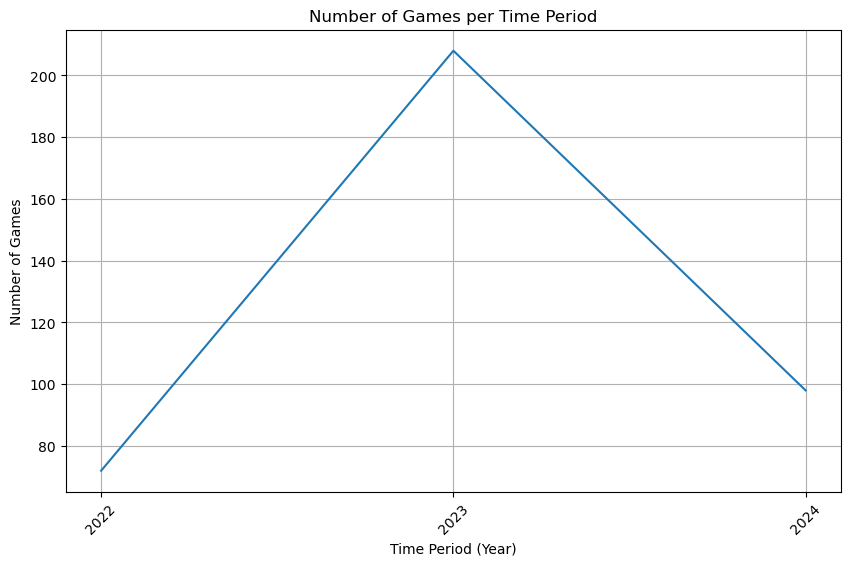

In [19]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.plot(games_per_period.index, games_per_period.values)
plt.xlabel('Time Period (Year)')  # Adjust label based on chosen format ('Year' or 'Month')
plt.ylabel('Number of Games')
plt.title('Number of Games per Time Period')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.grid(True)

# Show the plot
plt.show()

In [20]:
# Extract month from the date (assuming dd-mmm-yyyy format)
df['Month'] = pd.to_datetime(df['Date'], format='%d-%b-%Y').dt.month_name()


In [21]:
# Count games by month
games_per_month = df.groupby('Month')['Game'].count()


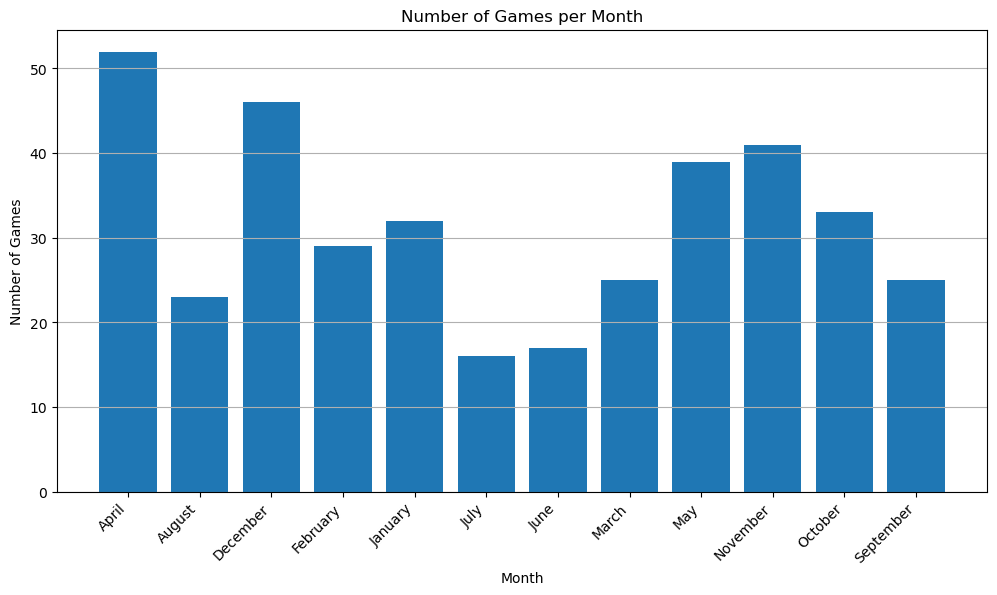

In [22]:
# Create the plot (adjust figure size as desired)
plt.figure(figsize=(12, 6))

# Use bar chart for monthly data
plt.bar(games_per_month.index, games_per_month.values)

# Customize labels and title
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.title('Number of Games per Month')

# Rotate x-axis labels if needed for readability
plt.xticks(rotation=45, ha='right')  # Right-align rotated labels

# Grid on y-axis
plt.grid(axis='y')

# Show the plot
plt.show()

In [23]:
# Extract year and month from the date (assuming dd-mmm-yyyy format)
df['Year-Month'] = pd.to_datetime(df['Date'], format='%d-%b-%Y').dt.strftime('%Y-%m')


In [24]:
# Count games by year-month
games_per_year_month = df.groupby('Year-Month')['Game'].count()

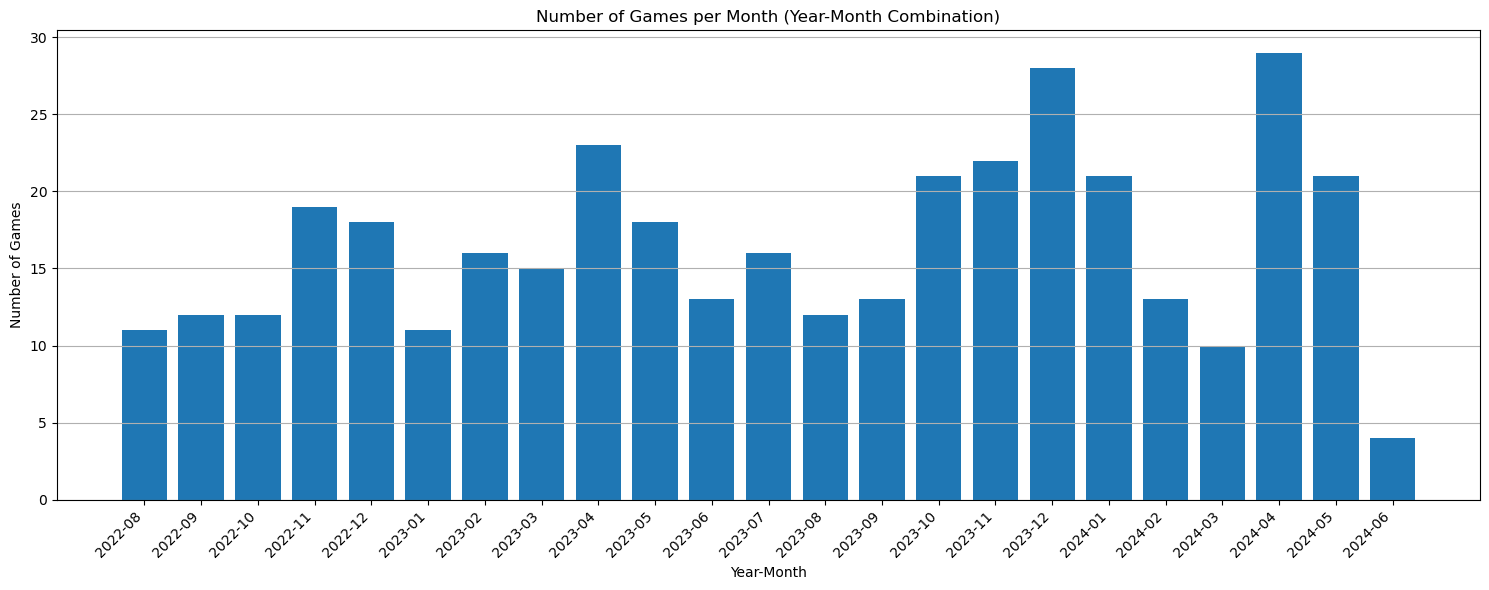

In [25]:
# Create the plot (adjust figure size as desired)
plt.figure(figsize=(15, 6))  # Adjust based on the number of months

# Use bar chart for monthly data
plt.bar(games_per_year_month.index, games_per_year_month.values)

# Customize labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Games')
plt.title('Number of Games per Month (Year-Month Combination)')

# Rotate x-axis labels if needed for readability (optional)
plt.xticks(rotation=45, ha='right')  # Uncomment if needed

# Grid on y-axis
plt.grid(axis='y')

# Show the plot with potentially long x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlapping elements

# Show the plot
plt.show()

In [26]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0,8.50,2022-08,2022,August
1,Destinies,10-Aug-2022,6.0,NaN,7.0,6.50,2022-08,2022,August
2,Rajas of the Ganges,11-Aug-2022,9.0,NaN,7.5,8.25,2022-08,2022,August
3,Dog Lover,11-Aug-2022,6.5,NaN,6.5,6.50,2022-08,2022,August
4,"Crew: Mission Deep Sea, The",13-Aug-2022,7.0,NaN,8.5,7.75,2022-08,2022,August


In [27]:
df[['Game', 'Dennis']]

,Game,Dennis
0,Clank! Legacy: Acquisitions Incorporated,8.0
1,Destinies,6.0
2,Rajas of the Ganges,9.0
3,Dog Lover,6.5
4,"Crew: Mission Deep Sea, The",7.0
...,...,...
373,Leviathan Wilds,NaN
374,"Message From the Stars, A",NaN
375,Sides,NaN
376,Almost Innocent,NaN


In [28]:
def get_top_10_games(df, player_name):
  """
  This function takes a DataFrame and a player name as input.
  The DataFrame is assumed to have separate rating columns for each player 
  (e.g., 'Player 1 Rating', 'Player 2 Rating'). It returns the top games for 
  the specified player based on their highest rating for each unique game.

  Args:
      df (pandas.DataFrame): The DataFrame containing game data 
                             with separate player rating columns.
      player_name (str): The name of the player for whom to find top games.

  Returns:
      pandas.DataFrame: A DataFrame containing the top games for the 
                        specified player, sorted by their highest rating.
  """

  # Select columns containing game and the specified player's rating
  player_data = df.loc[:,['Game', player_name]]

  # Rename the player rating column for clarity (optional)
  player_data.rename(columns={player_name: f'{player_name} Rating'}, inplace=True)

  # Group by game and select the row with the maximum rating for each game
  top_games_per_player = player_data.groupby('Game')[f'{player_name} Rating'].max().reset_index()

  # Sort by player's rating (descending) and select top 10 (or all if less than 10)
  top_games = top_games_per_player.sort_values(by=f'{player_name} Rating', ascending=False)
  return top_games.head(10)


In [29]:
get_top_10_games(df, 'Dennis')

,Game,Dennis Rating
108,Monikers,10.0
74,Hive Mind (app),9.5
160,"Search for Planet X, The",9.5
29,Cross Clues,9.5
141,Project: ELITE,9.5
18,"Castles of Burgundy, The",9.5
194,Turing Machine,9.5
101,Marvel United: Return of the Sinister Six,9.5
40,Dodos Riding Dinos,9.5
88,King of Monster Island,9.5


In [30]:
get_top_10_games(df, 'Fabiano')


,Game,Fabiano Rating
0,7 Wonders,10.0
108,Monikers,10.0
121,Obscurio (app),9.0
141,Project: ELITE,9.0
177,Stella (app),9.0
201,Voidfall,8.5
103,Mechs vs. Minions,8.5
196,Unusual Suspects (app),8.5
137,Pictomania,8.5
172,So Clover,8.5


In [31]:
get_top_10_games(df, 'Luke')


,Game,Luke Rating
0,7 Wonders,9.0
141,Project: ELITE,9.0
22,Clank! Legacy: Acquisitions Incorporated,9.0
103,Mechs vs. Minions,9.0
160,"Search for Planet X, The",9.0
35,Decrypto,8.5
20,Century: Golem Edition,8.5
86,Just One,8.5
28,"Crew: Mission Deep Sea, The",8.5
128,Orléans,8.5


In [32]:
# Select columns containing game and the specified player's rating
player_name = "Luke"  # Replace with the player name of interest
player_data = df[['Game', player_name]]

In [33]:
player_data.head()

,Game,Luke
0,Clank! Legacy: Acquisitions Incorporated,9.0
1,Destinies,7.0
2,Rajas of the Ganges,7.5
3,Dog Lover,6.5
4,"Crew: Mission Deep Sea, The",8.5


In [34]:
# Group data by game and find the maximum rating for each game
top_games_per_player = player_data.groupby('Game')[f'{player_name}'].max().reset_index()
top_games_per_player

,Game,Luke
0,7 Wonders,9.0
1,7 Wonders: Architects,7.0
2,Adrenaline,7.0
3,Aeon's End,7.5
4,Aeon’s End: Legacy,7.5
...,...,...
206,Wits & Wagers,7.3
207,Wonderland’s War,7.0
208,Word Slam,6.6
209,World Wonders,7.6


In [35]:
# Sort by player's rating (descending) and select top 10 (or all if less than 10)
top_games = top_games_per_player.sort_values(by=f'{player_name}', ascending=False)
top_games = top_games.head(10)  # Select top 10 (adjust for all if needed)

top_games  # Print the top games DataFrame

,Game,Luke
0,7 Wonders,9.0
141,Project: ELITE,9.0
22,Clank! Legacy: Acquisitions Incorporated,9.0
103,Mechs vs. Minions,9.0
160,"Search for Planet X, The",9.0
35,Decrypto,8.5
20,Century: Golem Edition,8.5
86,Just One,8.5
28,"Crew: Mission Deep Sea, The",8.5
128,Orléans,8.5


In [83]:
def get_top_10_plus_games(df, player_name):
  """
  This function takes a DataFrame and a player name as input.
  The DataFrame is assumed to have separate rating columns for each player 
  (e.g., 'Player 1 Rating', 'Player 2 Rating'). It returns the top games for 
  the specified player based on their highest rating for each unique game, 
  ensuring all games with the same rating at the 10th position (or later) 
  are included.

  Args:
      df (pandas.DataFrame): The DataFrame containing game data 
                             with separate player rating columns.
      player_name (str): The name of the player for whom to find top games.

  Returns:
      pandas.DataFrame: A DataFrame containing the top games for the 
                        specified player, sorted by their highest rating.
  """

  # Select columns containing game and the specified player's rating
  player_data = df.loc[:,['Game', player_name]]

  # Rename the player rating column for clarity (optional)
  player_data.rename(columns={player_name: f'{player_name}'}, inplace=True)

  # Group by game and select the row with the maximum rating for each game
  top_games_per_player = player_data.groupby('Game')[f'{player_name}'].max().reset_index()

  # Sort by player's rating (descending)
  top_games = top_games_per_player.sort_values(by=f'{player_name}', ascending=False)

  # Find the rating at the 10th position (or lower if fewer than 10 games)
  top_10th_rating = top_games.iloc[min(9, len(top_games) - 1), top_games.columns.get_loc(f'{player_name}')]

  # Filter games with rating equal to or higher than the 10th position
  top_games = top_games[top_games[f'{player_name}'] >= top_10th_rating]

  # Reset index and assign ranking (1 to n)
  top_games = top_games.reset_index(drop=True).assign(Rank=range(1, len(top_games) + 1))

  # Set 'Rank' as the index
  top_games = top_games.set_index('Rank')

  return top_games


In [84]:
get_top_10_plus_games(df, 'Dennis')

,Game,Dennis
Rank,,
1,Monikers,10.0
2,Hive Mind (app),9.5
3,"Search for Planet X, The",9.5
4,Cross Clues,9.5
5,Project: ELITE,9.5
6,"Castles of Burgundy, The",9.5
7,Turing Machine,9.5
8,Marvel United: Return of the Sinister Six,9.5
9,Dodos Riding Dinos,9.5


In [85]:
get_top_10_plus_games(df, 'Fabiano')

,Game,Fabiano
Rank,,
1,7 Wonders,10.0
2,Monikers,10.0
3,Obscurio (app),9.0
4,Project: ELITE,9.0
5,Stella (app),9.0
6,Voidfall,8.5
7,Mechs vs. Minions,8.5
8,Unusual Suspects (app),8.5
9,Pictomania,8.5


In [86]:
get_top_10_plus_games(df, 'Luke')

,Game,Luke
Rank,,
1,7 Wonders,9.0
2,Project: ELITE,9.0
3,Clank! Legacy: Acquisitions Incorporated,9.0
4,Mechs vs. Minions,9.0
5,"Search for Planet X, The",9.0
6,Decrypto,8.5
7,Century: Golem Edition,8.5
8,Just One,8.5
9,"Crew: Mission Deep Sea, The",8.5


In [40]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0,8.50,2022-08,2022,August
1,Destinies,10-Aug-2022,6.0,NaN,7.0,6.50,2022-08,2022,August
2,Rajas of the Ganges,11-Aug-2022,9.0,NaN,7.5,8.25,2022-08,2022,August
3,Dog Lover,11-Aug-2022,6.5,NaN,6.5,6.50,2022-08,2022,August
4,"Crew: Mission Deep Sea, The",13-Aug-2022,7.0,NaN,8.5,7.75,2022-08,2022,August


In [87]:
get_top_10_plus_games(df, 'Average')

,Game,Average
Rank,,
1,Project: ELITE,9.166667
2,"Search for Planet X, The",8.833333
3,Mechs vs. Minions,8.833333
4,Cross Clues,8.750000
5,7 Wonders,8.666667
6,So Clover,8.666667
7,Clank! Legacy: Acquisitions Incorporated,8.500000
8,Space Base,8.500000
9,Obscurio (app),8.466667


In [42]:
df[df['Game']=='King of Monster Island']

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
214,King of Monster Island,11-Oct-2023,9.0,7.0,7.3,7.766667,2023-10,2023,October
215,King of Monster Island,11-Oct-2023,9.0,7.0,7.3,7.766667,2023-10,2023,October
327,King of Monster Island,3-Apr-2024,9.5,NaN,7.3,8.400000,2024-04,2024,April


In [43]:
players = ['Dennis', 'Fabiano', 'Luke']


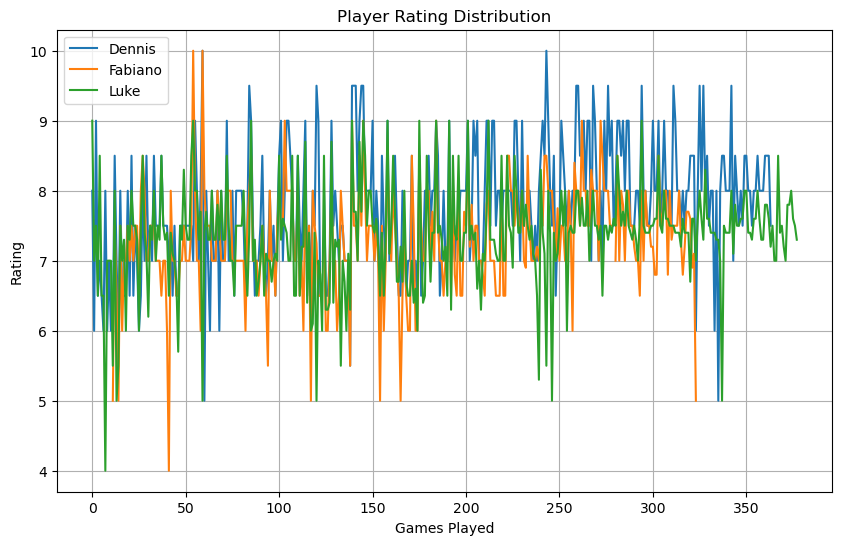

In [44]:
# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired

for player in players:
    plt.plot(df[player], label=player)

# Add labels and title
plt.xlabel('Games Played')
plt.ylabel('Rating')
plt.title('Player Rating Distribution')

# Add legend to differentiate player lines
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add gridlines
plt.show()

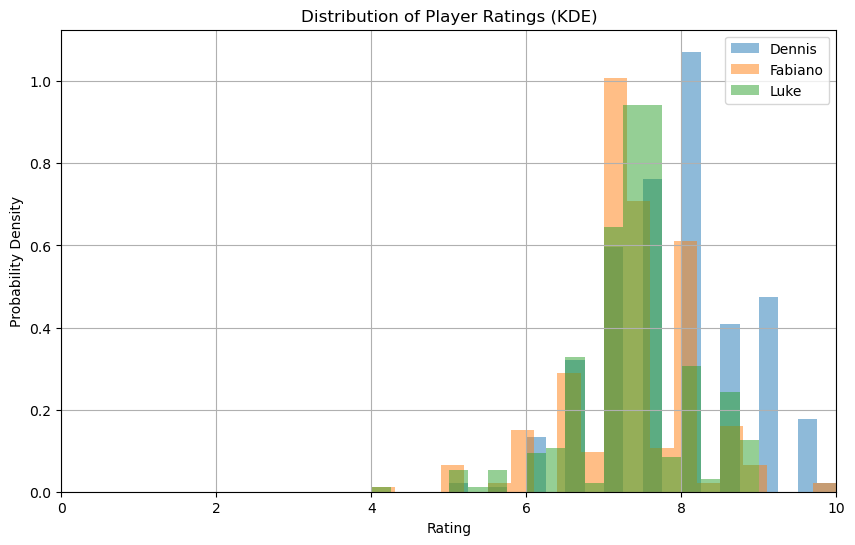

In [45]:
# Define a list of player names (assuming these exist in your DataFrame)
players = ['Dennis', 'Fabiano', 'Luke']  # Adjust player names as needed

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired

# Loop through players and plot KDE
for player in players:
  # Extract ratings for the current player
  ratings = df[player]

  # Use KDE to estimate the probability density
  density = plt.hist(ratings, density=True, bins=20, alpha=0.5, label=player)  # Adjust bins for smoothness

  # Adjust x-axis limits to 0-10 (assuming ratings are within this range)
  plt.xlim(0, 10)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Probability Density')
plt.title('Distribution of Player Ratings (KDE)')

# Add legend to differentiate players
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add gridlines
plt.show()


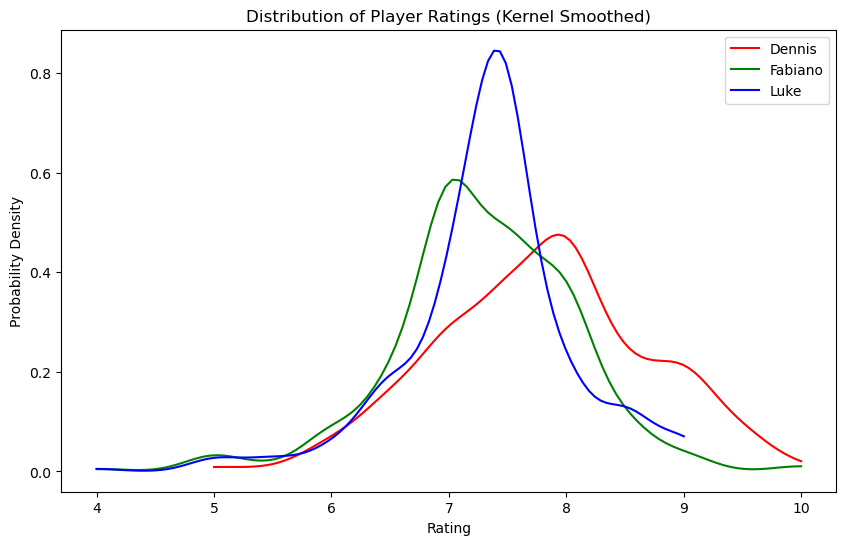

In [46]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired

players = ['Dennis', 'Fabiano', 'Luke'] 
colors = ['red', 'green', 'blue']

# Loop through players and plot smoothed distribution
for i, player in enumerate(players):
  # Extract ratings for the current player
  ratings = df[player].dropna() # need to drop for gaussian_kde

  # Use kernel smoothing to estimate the density
  density = stats.gaussian_kde(ratings)  # Gaussian kernel
  x = np.linspace(min(ratings), max(ratings), 100)  # Range and number of points
  y = density(x)  # Evaluate density at points

  # Plot the smoothed curve
  plt.plot(x, y, label=player, color=colors[i])

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Probability Density')
plt.title('Distribution of Player Ratings (Kernel Smoothed)')
plt.legend()

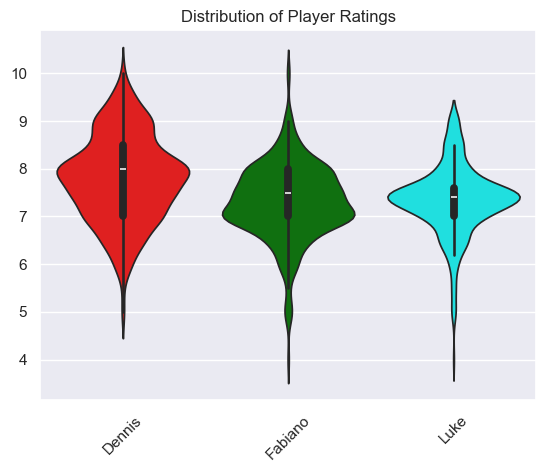

In [47]:

# Define a list of player names (assuming these exist in your DataFrame)
players = ['Dennis', 'Fabiano', 'Luke']  # Adjust player names as needed
custom_palette = ['red', 'green', 'cyan']

# Create the violin plot
sns.set_theme(style="darkgrid")  # Optional: Set theme for aesthetics

# Create a violin plot with hue for players
sns.violinplot(
    data=df[players],
    palette=custom_palette
)

# Rotate x labels to prevent overlapping (optional)
plt.xticks(rotation=45)  # You can adjust the rotation angle

# Add title
plt.title('Distribution of Player Ratings')

# Show the plot
plt.show()


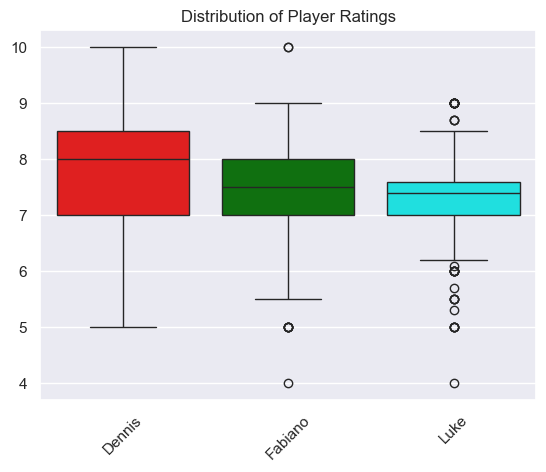

In [48]:
# Create a custom color list
custom_palette = ['red', 'green', 'cyan']

# Create a box plot with hue for players
# sns.boxplot(data = df[players])
sns.boxplot(
    data=df[players],
    palette=custom_palette
)


# Rotate x labels to prevent overlapping (optional)
plt.xticks(rotation=45)  # You can adjust the rotation angle

# Add title
plt.title('Distribution of Player Ratings')

# Show the plot
plt.show()


In [49]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0,8.50,2022-08,2022,August
1,Destinies,10-Aug-2022,6.0,NaN,7.0,6.50,2022-08,2022,August
2,Rajas of the Ganges,11-Aug-2022,9.0,NaN,7.5,8.25,2022-08,2022,August
3,Dog Lover,11-Aug-2022,6.5,NaN,6.5,6.50,2022-08,2022,August
4,"Crew: Mission Deep Sea, The",13-Aug-2022,7.0,NaN,8.5,7.75,2022-08,2022,August


In [58]:
def top_10_games(df, player1, player2, num_games=10):
    # Check if the player columns exist in the dataframe
    if player1 not in df.columns or player2 not in df.columns:
        raise ValueError(f"One or both player names {player1}, {player2} are not in the dataframe")
    
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    # Calculate the average rating for the two specified players
    df_copy['AverageRating'] = df_copy[[player1, player2]].mean(axis=1)
    
    # Group by 'Game' and calculate the mean of 'AverageRating'
    avg_rating_per_game = df_copy.groupby('Game')['AverageRating'].mean().reset_index()
    
    # Sort the games by average rating in descending order and get the top 10
    top_n_games = avg_rating_per_game.sort_values(by='AverageRating', ascending=False).head(num_games)

    # Reset the index of the resulting dataframe
    top_n_games.reset_index(drop=True, inplace=True)
    
    return top_n_games



In [59]:
top_10_games(df, 'Dennis', 'Fabiano')

,Game,AverageRating
0,Monikers,9.625000
1,Project: ELITE,9.166667
2,Rajas of the Ganges,9.000000
3,Cross Clues,8.775000
4,"Castles of Burgundy, The",8.750000
5,"Search for Planet X, The",8.750000
6,Hive Mind (app),8.625000
7,So Clover,8.562500
8,Mechs vs. Minions,8.525000
9,Obscurio (app),8.500000


In [60]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,NaN,9.0,8.50,2022-08,2022,August
1,Destinies,10-Aug-2022,6.0,NaN,7.0,6.50,2022-08,2022,August
2,Rajas of the Ganges,11-Aug-2022,9.0,NaN,7.5,8.25,2022-08,2022,August
3,Dog Lover,11-Aug-2022,6.5,NaN,6.5,6.50,2022-08,2022,August
4,"Crew: Mission Deep Sea, The",13-Aug-2022,7.0,NaN,8.5,7.75,2022-08,2022,August


In [61]:
top_10_games(df, 'Dennis', 'Luke')

,Game,AverageRating
0,Project: ELITE,9.166667
1,"Search for Planet X, The",9.125000
2,Mechs vs. Minions,8.830000
3,Just One,8.750000
4,Cross Clues,8.625000
5,So Clover,8.625000
6,Turing Machine,8.600000
7,Orléans,8.500000
8,Istanbul,8.500000
9,Just One (app),8.500000


In [74]:
top_10_games(df, 'Fabiano', 'Luke')

,Game,AverageRating
0,7 Wonders,9.50000
1,Project: ELITE,9.00000
2,Clank! Legacy: Acquisitions Incorporated,9.00000
3,"Search for Planet X, The",8.62500
4,Mechs vs. Minions,8.50500
5,Space Base,8.50000
6,Decrypto,8.50000
7,So Clover,8.43750
8,Great Dalmuti,8.30000
9,"Crew: Mission Deep Sea, The",8.28125


In [72]:
def euclidean_distance_between_players(df):
    players = df.columns[2:5]  # Assuming the first two columns are 'Game' and 'Date'
    num_players = len(players)
    distance_matrix = pd.DataFrame(np.zeros((num_players, num_players)), index=players, columns=players)

    for i in range(num_players):
        for j in range(i+1, num_players):
            player1 = players[i]
            player2 = players[j]
            
            # Select the rows where both players have non-NaN ratings
            valid_ratings = df[[player1, player2]].dropna()
            
            # Ensure ratings are numeric
            valid_ratings = valid_ratings.apply(pd.to_numeric, errors='coerce').dropna()
            
            # Calculate the Euclidean distance only if there are valid ratings
            if not valid_ratings.empty:
                distance = np.linalg.norm(valid_ratings[player1] - valid_ratings[player2])
            else:
                distance = np.nan  # If no valid ratings, distance is not defined
            
            # Fill the distance matrix (symmetric)
            distance_matrix.at[player1, player2] = distance
            distance_matrix.at[player2, player1] = distance
    
    return distance_matrix



In [71]:
distance_matrix = euclidean_distance_between_players(df)
print(distance_matrix)

            Dennis    Fabiano       Luke
Dennis    0.000000  16.752463  18.987628
Fabiano  16.752463   0.000000  13.639831
Luke     18.987628  13.639831   0.000000
